# COM S 474/574 Spring 2024
# 4.1 Linear Regression
## Gabriel Ferreira(gabferre@iastate.edu)

### - The Real Estate Dataset

- data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/
- a local copy is saved as "data/Real_estate.csv"

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Dataset

In [34]:
x=[1,2,3,4,5,6,10]
y=[0,1,3,2,20,-6,80]

### Visualize

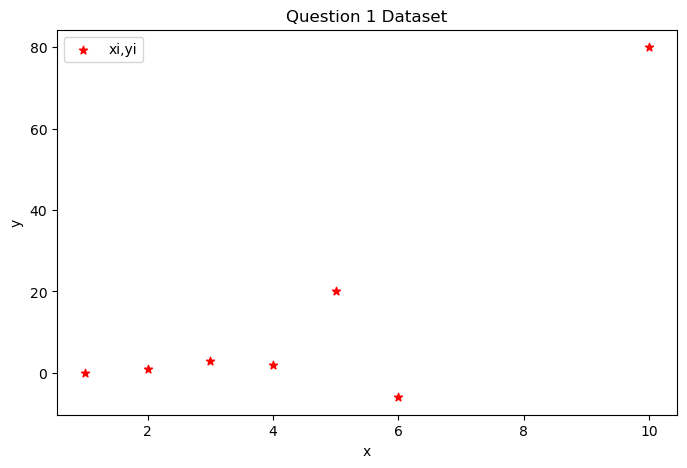

In [72]:
# Creating a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x,y, c='r', marker='*',label='xi,yi')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Question 1 Dataset')
plt.legend()

### 1.a)

In [83]:
x_mean = round(np.mean(x), 2)
y_mean = round(np.mean(y), 2)
print("x_mean:", x_mean, " | ", "y_mean:", y_mean)

x_mean: 4.43  |  y_mean: 14.29


### 1.b)
Sample x Variance = np.mean((x-x_mean)**2)\
Sample y Variance = np.mean((y-y_mean)**2)\
Sample Covariance = np.mean((x-x_mean)*(y-y_mean))

In [87]:
# Sample x Variance = np.mean((x-x_mean)**2)
x_variance = np.mean((x-x_mean)**2)

# Sample y Variance = np.mean((y-y_mean)**2)
y_variance = np.mean((y-y_mean)**2)

# Sample Covariance = np.mean((x-x_mean)*(y-y_mean))
sxy = np.mean((x-x_mean)*(y-y_mean))

print("Sample x Variance:", x_variance, " | ", "Sample y Variance:", y_variance, " | ", "Sample Covariance:", round(sxy, 2))

Sample x Variance: 7.673471428571427  |  Sample y Variance: 774.4898142857145  |  Sample Covariance: 62.88


### 1.c) What is the solution (a, b) in y = ax + b?
a = slope\
b = intercept

In [88]:
# slope = Sample Covariance / Sample x Variance
a = sxy/x_variance

# intercept = y mean - (slope*x mean)
b = y_mean - a * x_mean

print("Slope:", a, " | ", "Intercept:", b)

Slope: 8.194147554747993  |  Intercept: -22.010073667533604


In [59]:
from numpy import array
# Constructing the design matrix X
X = array([[1, xi, xi**2] for xi in x])
print(X.shape)
X

(7, 3)


array([[  1,   1,   1],
       [  1,   2,   4],
       [  1,   3,   9],
       [  1,   4,  16],
       [  1,   5,  25],
       [  1,   6,  36],
       [  1,  10, 100]])

In [63]:
print(X.T.shape)
X.T

(3, 7)


array([[  1,   1,   1,   1,   1,   1,   1],
       [  1,   2,   3,   4,   5,   6,  10],
       [  1,   4,   9,  16,  25,  36, 100]])

In [51]:
XTX = X.T @ X
XTX

array([[    7,    31,   191],
       [   31,   191,  1441],
       [  191,  1441, 12275]])

In [53]:
from numpy.linalg import inv
XTX_inv = inv(XTX)
XTX_inv

array([[ 1.51880057, -0.59662066,  0.04640647],
       [-0.59662066,  0.28016137, -0.02360554],
       [ 0.04640647, -0.02360554,  0.0021305 ]])

In [62]:
XTy = X.T @ y
XTy

array([ 100,  883, 8347])

In [56]:
theta = XTX_inv @ XTy
theta

array([12.41884817, -9.31500873,  1.58027923])

In [80]:
import numpy as np
from sklearn import linear_model
X = np.array([1, 2, 3, 4, 5, 6, 10]).reshape(-1,1) 
Y = np.array([0, 1, 3, 2, 20, -6,80])
"""fit y=ax+b"""
model = linear_model.LinearRegression(fit_intercept=True) 
model.fit(X, Y)
print ("a = %s, b=%s, score=%s" % 
       ("{:.3f}".format(model.coef_[0]),
        "{:.3f}z".format(model.intercept_), 
        "{:.3f}".format(model.score(X, Y))))


a = 8.194, b=-22.003, score=0.665
